# Proyek Analisis Data: E-Commerce
- **Nama:** Robby Sutiawan
- **Email:** robbysoetiawan@gmail.com
- **ID Dicoding:** robbysoetiawan

## Menentukan Pertanyaan Bisnis

- Bagaimana trend penjualan per bulan?
- Bagaimana komposisi status pesanan?
- Bagaimana distribusi penjualan berdasarkan wilayah?
- Produk apa yang paling memberikan revenue terbesar?
- Siapa pelanggan yang menyumbang revenue terbesar?
- Bagaimana segmentasi pelanggan berdasar RFM?

## Import Semua Packages/Library yang Digunakan

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [58]:
# import dataset order
df_order = pd.read_csv('dataset\order_items_dataset.csv')
df_order = df_order[['order_id','product_id','shipping_limit_date','price','freight_value']]
df_order.head()

,order_id,product_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14


In [59]:
# import dataset status
df_status = pd.read_csv('dataset\orders_dataset.csv')
df_status = df_status[['order_id','customer_id','order_status','order_purchase_timestamp','order_delivered_customer_date', 'order_estimated_delivery_date']]
df_status.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00


In [60]:
# import dataset product
df_product = pd.read_csv('dataset\products_dataset.csv')
df_product = df_product[['product_id','product_category_name']]
df_product.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [61]:
# import dataset customer
df_customer = pd.read_csv('dataset\customers_dataset.csv')
df_customer = df_customer[['customer_id','customer_city','customer_state']]
df_customer.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [62]:
# import dataset produk dalam bahasa inggris
df_product_english = pd.read_csv('dataset\product_category_name_translation.csv')
df_product_english.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [63]:
# meggabungkan semua data menjadi satu dataset
df_gabung = pd.merge(df_status, df_order, how='inner', on='order_id')
df_gabung = pd.merge(df_gabung, df_product, how='left', on='product_id')
df_gabung = pd.merge(df_gabung, df_customer, how='left', on='customer_id')
df_gabung = pd.merge(df_gabung, df_product_english, how='left', on='product_category_name')
df_gabung = df_gabung.drop('product_category_name', axis=1)
print(df_gabung.shape)
df_gabung.head()

(112650, 13)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,product_id,shipping_limit_date,price,freight_value,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,sao goncalo do amarante,RN,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,santo andre,SP,stationery


**Insight:**
- Dataset ini adalah data penjualan sebuah e-commerce di Brazil
- Dataset dikumpulkan dari beberapa tabel data sesuai dengan yang dibutuhkan
- Feature yang diambil hanya beberapa variabel yang mendukung analisis
- Dataset yang sudah digabungkan diberi nama df_gabung

### Assessing Data

In [64]:
#Melihat missing value
print('Jumlah missing value di setiap kolom:')
print(df_gabung.isnull().sum())
print('')

# melihat data duplikat
print('Jumlah data duplikat:')
print(df_gabung.duplicated().sum())

Jumlah missing value di setiap kolom:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2454
order_estimated_delivery_date       0
product_id                          0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_city                       0
customer_state                      0
product_category_name_english    1627
dtype: int64

Jumlah data duplikat:
10225


In [65]:
# melihat tipe data
df_gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_delivered_customer_date  110196 non-null  object 
 5   order_estimated_delivery_date  112650 non-null  object 
 6   product_id                     112650 non-null  object 
 7   shipping_limit_date            112650 non-null  object 
 8   price                          112650 non-null  float64
 9   freight_value                  112650 non-null  float64
 10  customer_city                  112650 non-null  object 
 11  customer_state                 112650 non-null  object 
 12  product_category_name_english 

In [66]:
# melihat statistika deskriptif pada data
df_gabung.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,product_id,shipping_limit_date,price,freight_value,customer_city,customer_state,product_category_name_english
count,112650,112650,112650,112650,110196,112650,112650,112650,112650.000000,112650.000000,112650,112650,111023
unique,98666,98666,7,98112,95664,450,32951,93318,NaN,NaN,4110,27,71
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-31 18:03:02,2017-12-20 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,2017-07-21 18:25:23,NaN,NaN,sao paulo,SP,bed_bath_table
freq,21,21,110197,21,21,604,527,21,NaN,NaN,17808,47449,11115
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.653739,19.990320,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.633928,15.806405,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.990000,16.260000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.900000,21.150000,NaN,NaN,NaN


**Insight:**
- Dari dataset gabungan terdapat data duplikat sebanyak 10225
- Terdapat missing value pada kolom product_category_name sebanyak 1627 dan order_delivered_customer_date sebanyak 2454
- Terdapat tipe data tanggal yang masih berupa object
- Tidak terdapat nilai yang tidak konsisten

### Cleaning Data

In [67]:
# menghapus duplikat data
df_gabung = df_gabung.drop_duplicates()

# merubah tipe data tanggal menjadi timestamp
df_gabung['order_purchase_timestamp'] = pd.to_datetime(df_gabung['order_purchase_timestamp'])
df_gabung['order_delivered_customer_date'] = pd.to_datetime(df_gabung['order_delivered_customer_date'])
df_gabung['order_estimated_delivery_date'] = pd.to_datetime(df_gabung['order_estimated_delivery_date'])
df_gabung['shipping_limit_date'] = pd.to_datetime(df_gabung['shipping_limit_date'])

# Mengisi missing value order_delivered_customer_date dengan nilai dari kolom estimasi
df_gabung['order_delivered_customer_date'] = df_gabung['order_delivered_customer_date'].fillna(df_gabung['order_estimated_delivery_date'])

# menghapus data yang kosong
df_gabung = df_gabung.dropna()

In [68]:
# Cek missing value setelah dihapus
print('Jumlah missing value di setiap kolom:')
print(df_gabung.isnull().sum())
print('')

# Cek data duplikat setelah dihapus
print('Jumlah data duplikat:')
print(df_gabung.duplicated().sum())

Jumlah missing value di setiap kolom:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_id                       0
shipping_limit_date              0
price                            0
freight_value                    0
customer_city                    0
customer_state                   0
product_category_name_english    0
dtype: int64

Jumlah data duplikat:
0


In [69]:
# melihat tipe data setelah diganti
df_gabung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100943 entries, 0 to 112649
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100943 non-null  object        
 1   customer_id                    100943 non-null  object        
 2   order_status                   100943 non-null  object        
 3   order_purchase_timestamp       100943 non-null  datetime64[ns]
 4   order_delivered_customer_date  100943 non-null  datetime64[ns]
 5   order_estimated_delivery_date  100943 non-null  datetime64[ns]
 6   product_id                     100943 non-null  object        
 7   shipping_limit_date            100943 non-null  datetime64[ns]
 8   price                          100943 non-null  float64       
 9   freight_value                  100943 non-null  float64       
 10  customer_city                  100943 non-null  object        
 11  custo

In [70]:
# preview dataset yang telah dibersihkan
df_gabung.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,product_id,shipping_limit_date,price,freight_value,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,sao goncalo do amarante,RN,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,santo andre,SP,stationery


**Insight:**
- Jumlah baris pada dataset setelah dibersihkan menjadi 100.943
- Tipe data tanggal telah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

#### Statistika Deskriptif

In [71]:
# statistika descriptive untuk numerik
df_gabung.describe()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value
count,100943,100943,100943,100943,100943.000000,100943.000000
mean,2018-01-01 15:36:14.433086208,2018-01-14 10:05:58.683365888,2018-01-25 11:20:42.344689664,2018-01-08 06:03:40.065552128,124.510297,20.147033
min,2016-09-04 21:15:19,2016-10-11 13:46:32,2016-10-04 00:00:00,2016-09-19 00:15:34,0.850000,0.000000
25%,2017-09-13 16:59:28.500000,2017-09-25 19:21:19,2017-10-04 00:00:00,2017-09-20 17:55:29,40.360000,13.160000
50%,2018-01-20 17:38:58,2018-02-02 19:27:45,2018-02-16 00:00:00,2018-01-26 14:53:14,78.670000,16.350000
75%,2018-05-06 00:22:48.500000,2018-05-16 15:03:53.500000,2018-05-28 00:00:00,2018-05-11 09:14:02.500000,139.000000,21.260000
max,2018-09-03 09:06:57,2018-10-17 13:22:46,2018-10-25 00:00:00,2020-04-09 22:35:08,6735.000000,409.680000
std,NaN,NaN,NaN,NaN,188.622344,15.919582


In [72]:
# statistika descriptive untuk non-numerik
df_gabung.describe(include='O')

,order_id,customer_id,order_status,product_id,customer_city,customer_state,product_category_name_english
count,100943,100943,100943,100943,100943,100943,100943
unique,97256,97256,7,32328,4095,27,71
top,ca3625898fbd48669d50701aba51cd5f,0d861a5e4dd6a9079d89e1330848f0ab,delivered,99a4788cb24856965c36a24e339b6058,sao paulo,SP,bed_bath_table
freq,8,8,98775,467,15812,42446,10160


#### Preview Data Penjualan

In [73]:
# preview data
transaksi = df_gabung['order_id'].shape[0]
sales = df_gabung[(df_gabung['order_status']!='canceled') & (df_gabung['order_status']!='unavailable')]['price'].sum()
customer = df_gabung['customer_id'].nunique()
state = df_gabung['customer_state'].nunique()
city = df_gabung['customer_city'].nunique()
produk = df_gabung['product_category_name_english'].nunique()
print(f'Jumlah Transaksi : {transaksi}')
print(f'Total Penjualan : {sales}')
print(f'Pelanggan : {customer}')
print(f'Negara Bagian : {state}')
print(f'Kota : {city}')
print(f'Kategori Produk : {produk}')

Jumlah Transaksi : 100943
Total Penjualan : 12483209.610000001
Pelanggan : 97256
Negara Bagian : 27
Kota : 4095
Kategori Produk : 71


#### Distribusi Status Penjualan

In [74]:
df_gabung['order_status'].value_counts()

order_status
delivered      98775
shipped         1103
canceled         449
invoiced         314
processing       293
unavailable        7
approved           2
Name: count, dtype: int64

#### Bagaimana Trend Penjualan Per Bulannya?

In [75]:
df_gabung['month_year'] = df_gabung['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
df_nocancel = df_gabung[(df_gabung['order_status']!='canceled') & (df_gabung['order_status']!='unavailable')]

print('Jumlah penjualan per bulan :')
df_nocancel.groupby('month_year')['price'].sum()

Jumlah penjualan per bulan :


month_year
2016-09-01       117.88
2016-10-01     41404.77
2016-12-01        10.90
2017-01-01    108779.16
2017-02-01    223373.37
2017-03-01    341861.82
2017-04-01    325669.54
2017-05-01    464196.18
2017-06-01    407480.07
2017-07-01    459496.93
2017-08-01    527186.82
2017-09-01    564290.23
2017-10-01    595977.11
2017-11-01    916957.19
2017-12-01    690183.07
2018-01-01    867099.99
2018-02-01    766737.89
2018-03-01    902100.01
2018-04-01    928377.67
2018-05-01    920181.68
2018-06-01    805932.49
2018-07-01    819153.00
2018-08-01    806496.84
2018-09-01       145.00
Name: price, dtype: float64

#### Kota Apa yang Memiliki Penjualan Terbesar?

In [76]:
df_nocancel.groupby('customer_city')['price'].sum().sort_values(ascending=False).head(10)

customer_city
sao paulo         1744948.91
rio de janeiro     901550.92
belo horizonte     326691.04
brasilia           283774.49
curitiba           190442.19
campinas           173790.76
porto alegre       167350.85
salvador           162918.37
guarulhos          131370.74
niteroi            109289.36
Name: price, dtype: float64

#### Siapa pelanggan yang Memiliki Pembelian Terbesar?

In [77]:
df_nocancel.groupby('customer_id')['price'].sum().sort_values(ascending=False).head(10)

customer_id
c6e2731c5b391845f6800c97401a43a9    6735.00
f48d464a0baaea338cb25f816991ab1f    6729.00
3fd6777bbce08a352fddd04e4a7cc8f6    6499.00
df55c14d1476a9a3467f131269c2477f    4799.00
24bbf5fd2f2e1b359ee7de94defc4a15    4690.00
3d979689f636322c62418b6346b1c6d2    4590.00
cc803a2c412833101651d3f90ca7de24    4400.00
1afc82cd60e303ef09b4ef9837c9505c    4399.87
35a413c7ca3c69756cb75867d6311c0d    4099.99
e9b0d0eb3015ef1c9ce6cf5b9dcbee9f    4059.00
Name: price, dtype: float64

#### Kategori Produk Apa yang Memiliki Penjualan Terbesar?

In [78]:
df_nocancel.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10)

product_category_name_english
health_beauty            1209163.71
watches_gifts            1180771.49
bed_bath_table            962495.27
sports_leisure            921555.59
computers_accessories     800063.22
furniture_decor           631090.01
cool_stuff                609411.33
housewares                568795.72
auto                      558054.38
toys                      470880.84
Name: price, dtype: float64

## Visualization & Explanatory Analysis

### Distribusi Status Penjualan

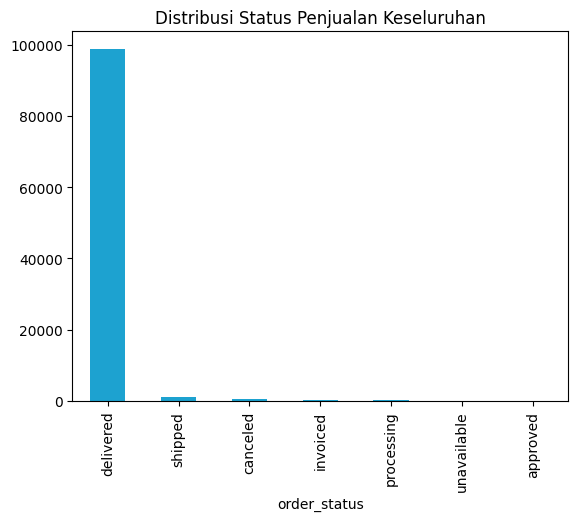

In [79]:
df_gabung['order_status'].value_counts().plot(kind='bar', color='#1da2d0')
plt.title('Distribusi Status Penjualan Keseluruhan');

#### Bagaimana Trend Penjualan Per Bulannya?

Text(0.5, 1.0, 'Trend Penjualan Per Bulan')

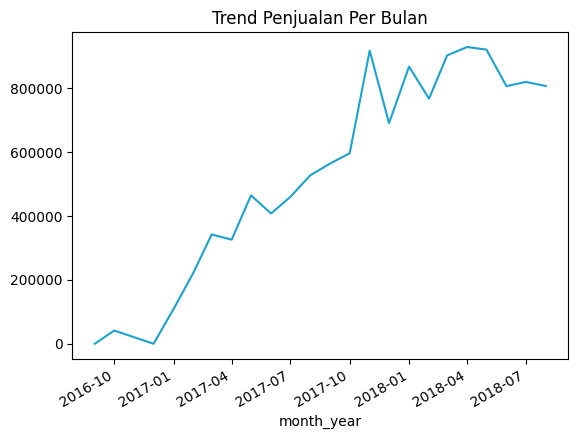

In [80]:
df_gabung['month_year'] = df_gabung['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
df_nocancel = df_gabung[(df_gabung['order_status']!='canceled') & (df_gabung['order_status']!='unavailable')]

df_nocancel[df_nocancel['month_year'] < '2018-09-01'].groupby('month_year')['price'].sum().plot(color='#1da2d0')
plt.title('Trend Penjualan Per Bulan')

Penjualan memiliki trend peningkatan, namun pada semester I 2018 penjualan sedikit mengalami perlambatan.

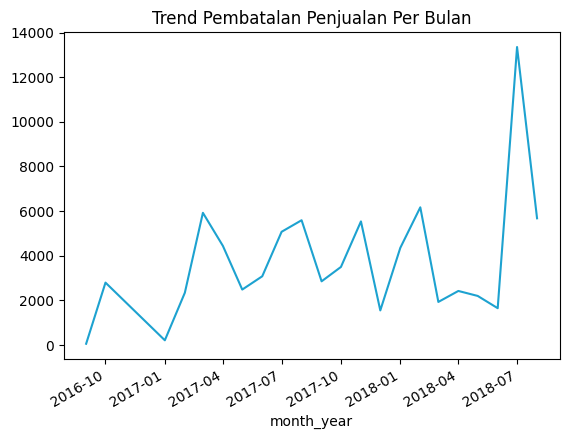

In [81]:
df_gabung[df_gabung['order_status']=='canceled'].groupby('month_year')['price'].sum().plot(color='#1da2d0')
plt.title('Trend Pembatalan Penjualan Per Bulan');

Pembatalan pesanan mengalami peningkatan di 2018, kemungkinan ini menjadi salah satu alasan total penjualan mengalami perlambatan.

#### Bagaimana hubungan lama pemrosesan barang dengan pembatalan pesanan?

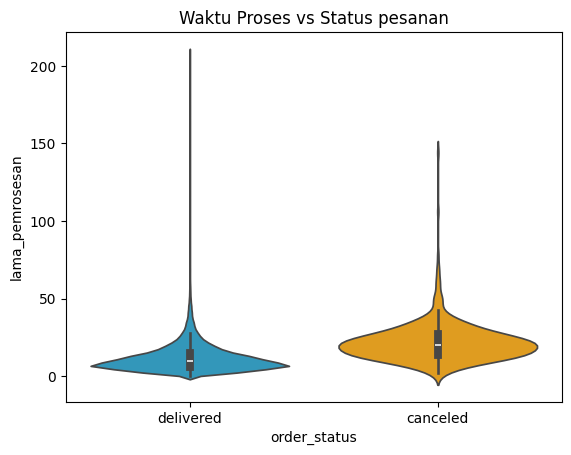

In [82]:
df_gabung['lama_pemrosesan'] = (df_gabung['order_delivered_customer_date'] - df_gabung['order_purchase_timestamp']).dt.days
df_ccldlv = df_gabung[(df_gabung['order_status']=='canceled') | (df_gabung['order_status']=='delivered')]
palette = {'canceled': 'orange', 'delivered': '#1da2d0'}
sns.violinplot(x='order_status', y='lama_pemrosesan', data=df_ccldlv, palette=palette)
plt.title('Waktu Proses vs Status pesanan')
plt.show()

Waktu pemrosesan pesanan yang lebih lama membuat pelanggan cenderung melakukan pembatalan.

#### Negara Bagian Apa yang Memiliki Penjualan Terbesar?

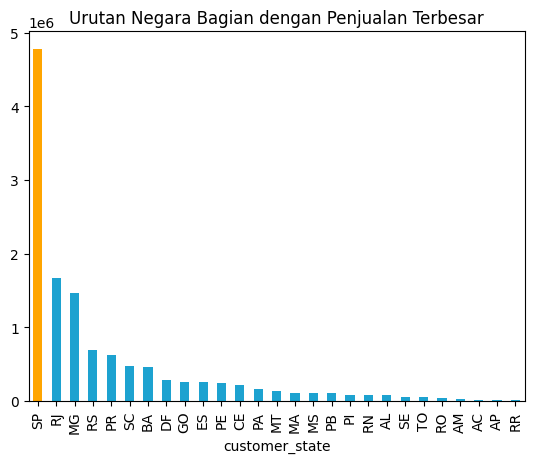

In [83]:
# Menghitung total penjualan per negara bagian
sales = df_nocancel.groupby('customer_state')['price'].sum().sort_values(ascending=False)

# Menentukan warna, dengan warna orange untuk penjualan terbesar
colors = ['orange' if i == sales.max() else '#1da2d0' for i in sales]

sales.plot(kind='bar', color=colors)
plt.title('Urutan Negara Bagian dengan Penjualan Terbesar')
plt.ylabel('');

Penjualan terbesar E-Commerce berada di negara bagian São Paulo. São Paulo merupakan negara bagian terpadat dan pusat ekonomi terbesar di Brasil, sekaligus salah satu metropolitan terbesar di dunia.

#### Kota Apa yang Memiliki Penjualan Terbesar?

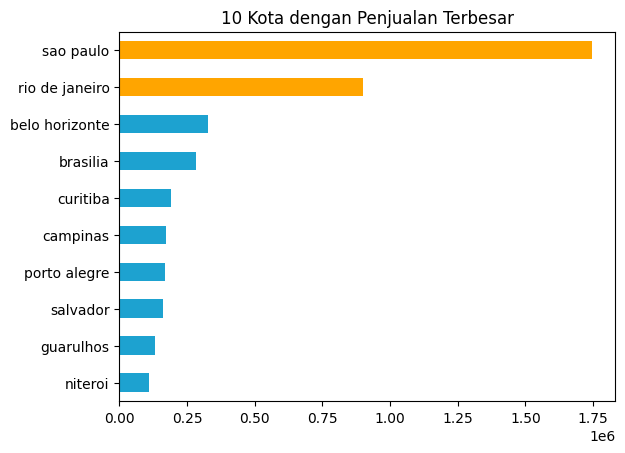

In [84]:
city_sales = df_nocancel.groupby('customer_city')['price'].sum().sort_values().tail(10)
colors2 = ['orange' if i in city_sales.nlargest(2).values else '#1da2d0' for i in city_sales]
city_sales.plot(kind='barh', color=colors2)
plt.title('10 Kota dengan Penjualan Terbesar')
plt.ylabel('');

Ibukotanya São Paulo yaitu kota São Paulo menjadi pusat penjualan terbesar, diikuti Rio De Janeiro di posisi kedua.

#### Siapa pelanggan yang Memiliki Pembelian Terbesar?

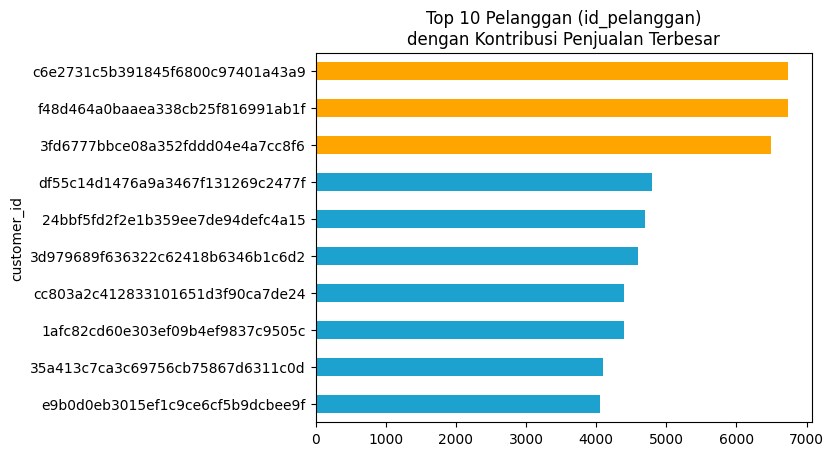

In [85]:
cust_sales = df_nocancel.groupby('customer_id')['price'].sum().sort_values().tail(10)
colors3 = ['orange' if i in cust_sales.nlargest(3).values else '#1da2d0' for i in cust_sales]
cust_sales.plot(kind='barh', color=colors3)
plt.title('Top 10 Pelanggan (id_pelanggan)\ndengan Kontribusi Penjualan Terbesar');

#### Kategori Produk Apa yang Memiliki Penjualan Terbesar?

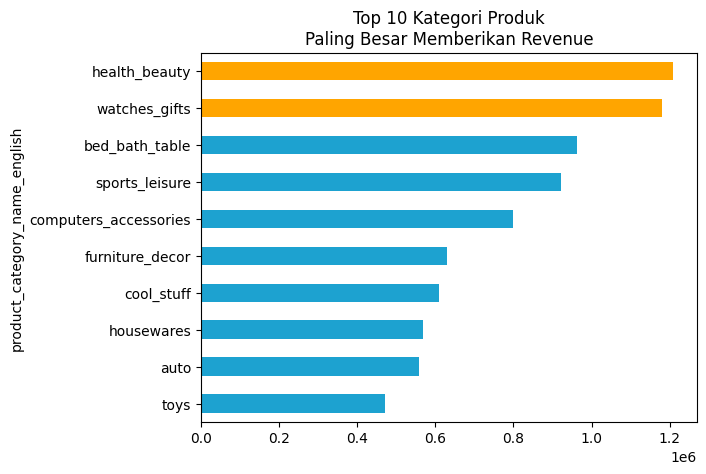

In [86]:
prod_sales = df_nocancel.groupby('product_category_name_english')['price'].sum().sort_values().tail(10)
colors2 = ['orange' if i in prod_sales.nlargest(2).values else '#1da2d0' for i in prod_sales]
prod_sales.plot(kind='barh', color=colors2)
plt.title('Top 10 Kategori Produk\nPaling Besar Memberikan Revenue');

Produk kecantikan dan aksesoris menjadi kategori yang paling menyumbang revenue terbesar

**Insight:**
- Penjualan mengalami trend kenaikan namun terjadi perlambatan pada semester I 2018
- Salah satu alasan terjadinya perlambatan adalah karena tingginya pembatalan pesanan pada tahun 2018
- Lamanya pemrosesan barang cenderung membuat pelanggan melakukan pembatalan pesanan
- Pusat ekonomi seperti Sao Paulo dan Rio De Janeiro menjadi daerah yang menyumbang revenue terbesar

## Analisis RFM Menggunakan K-Means Cluster

Segmentasi RFM (Recency, Frequency, Monetary) adalah metode untuk mengelompokkan pelanggan berdasarkan:

- **Recency (R)**: Seberapa baru pelanggan melakukan pembelian terakhir.
- **Frequency (F)**: Seberapa sering pelanggan melakukan pembelian.
- **Monetary (M)**: Total jumlah uang yang dihabiskan pelanggan.

Dalam pembuatan segmentasi ini juga digunakan model machine learning **K-Means**,  K-Means adalah algoritma clustering yang digunakan untuk mengelompokkan data ke dalam beberapa grup (cluster) berdasarkan kemiripan antar data.

In [87]:
# membuat salinan dataset
ss_clean = df_gabung.copy()

In [88]:
# menentukan tanggal order paling terbaru
latest_date = ss_clean['order_purchase_timestamp'].max()
latest_date

Timestamp('2018-09-03 09:06:57')

In [89]:
# menghitung recency
recency = ss_clean.groupby('customer_id').agg({'order_purchase_timestamp': lambda x : (latest_date - x.max()).days}).reset_index()
recency.rename(columns= {'order_purchase_timestamp':'Recency'}, inplace= True)

# menghitung frequency
frequency = ss_clean.groupby('customer_id').size().reset_index(name='Frequency')

# menghitung monetary
monetary = ss_clean.groupby('customer_id').agg({'price':'sum'}).reset_index()
monetary.rename(columns= {'price':'Monetary'}, inplace= True)

In [90]:
# menggabungkan data menjadi 1 dataset
RFM = pd.concat([recency.iloc[:,:], frequency.iloc[:,-1], monetary.iloc[:,-1]], axis= 1)
RFM

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80
1,000161a058600d5901f007fab4c27140,413,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,153,1,93.00
...,...,...,...,...
97251,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00
97252,fffecc9f79fd8c764f843e9951b11341,157,1,54.90
97253,fffeda5b6d849fbd39689bb92087f431,103,1,47.90
97254,ffff42319e9b2d713724ae527742af25,81,1,199.90


In [91]:
# statistika deskriptif RFM
RFM.describe().style.background_gradient(subset=['Recency','Frequency','Monetary'], cmap='RdPu')

,Recency,Frequency,Monetary
count,97256.000000,97256.000000,97256.000000
mean,244.098462,1.037910,129.230514
std,153.396859,0.225860,193.357312
min,0.000000,1.000000,0.850000
25%,120.000000,1.000000,43.900000
50%,225.000000,1.000000,79.900000
75%,354.000000,1.000000,144.900000
max,728.000000,8.000000,6735.000000


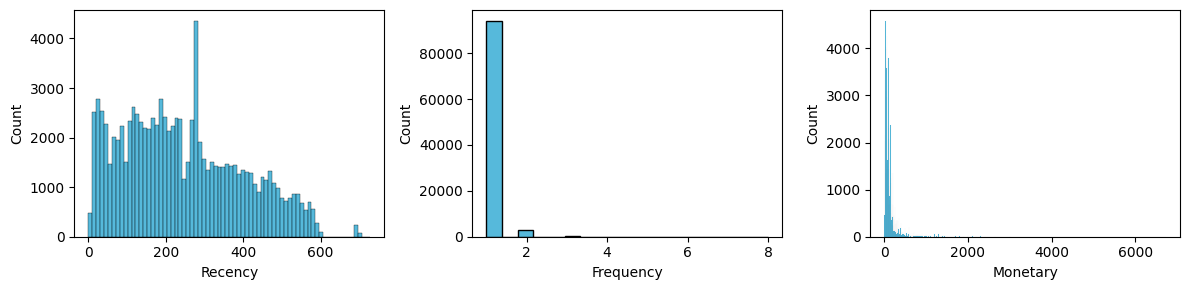

In [92]:
# melihat persebaran data pada tiap variabel
fig, axis = plt.subplots(1,3, figsize= (12,3))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.histplot(x= RFM[feature], ax= axis[i], color= '#1da2d0')

plt.tight_layout()
plt.show()

Terlihat bahwa monetary dan frequency memiliki outlier, namun saya akan tetap mempertahankan data frequency karena menunjukan variasi data, sedangkan monetary memiliki outlier yang sangat jauh, sehingga saya akan membuangnya.

In [93]:
# membuang outlier data monetary
Q1 = RFM['Monetary'].quantile(0.25)
Q3 = RFM['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
rfm_clean = RFM[(RFM['Monetary'] >= lower_bound) & (RFM['Monetary'] <= upper_bound)]

# Menampilkan data tanpa outlier
rfm_clean

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,89.80
1,000161a058600d5901f007fab4c27140,413,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,551,1,179.99
3,0002414f95344307404f0ace7a26f1d5,382,1,149.90
4,000379cdec625522490c315e70c7a9fb,153,1,93.00
...,...,...,...,...
97251,fffcb937e9dd47a13f05ecb8290f4d3e,170,1,78.00
97252,fffecc9f79fd8c764f843e9951b11341,157,1,54.90
97253,fffeda5b6d849fbd39689bb92087f431,103,1,47.90
97254,ffff42319e9b2d713724ae527742af25,81,1,199.90


dataset kini tinggal 89690 baris

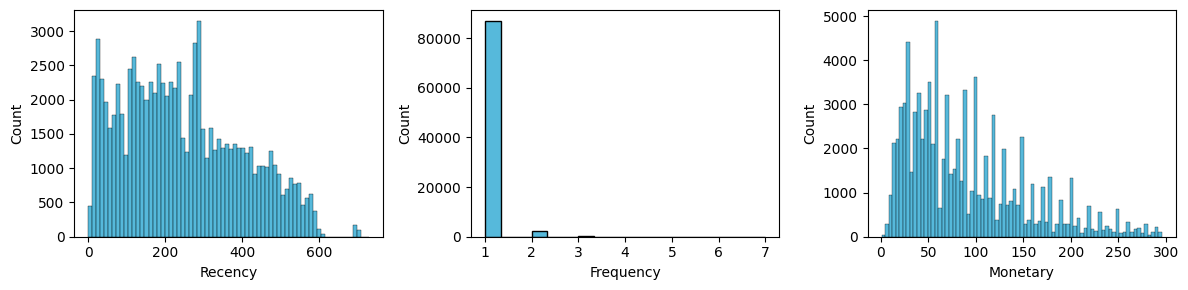

In [94]:
fig, axis = plt.subplots(1,3, figsize= (12,3))

for i,feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.histplot(x= rfm_clean[feature], ax= axis[i], color= '#1da2d0')

plt.tight_layout()
plt.show()

Persebaran data sudah cukup baik

In [95]:
# melakukan standarisasi data menggunakan Standard Scaler
sc = StandardScaler()
rfm_clean = rfm_clean.drop('customer_id', axis=1)
rfm_trans = sc.fit_transform(rfm_clean)
rfm_trans = pd.DataFrame(rfm_trans,columns=rfm_clean.columns)
rfm_trans.head()

,Recency,Frequency,Monetary
0,0.314896,-0.164922,0.005555
1,1.105365,-0.164922,-0.553939
2,2.006890,-0.164922,1.451421
3,0.902848,-0.164922,0.969038
4,-0.593163,-0.164922,0.056855


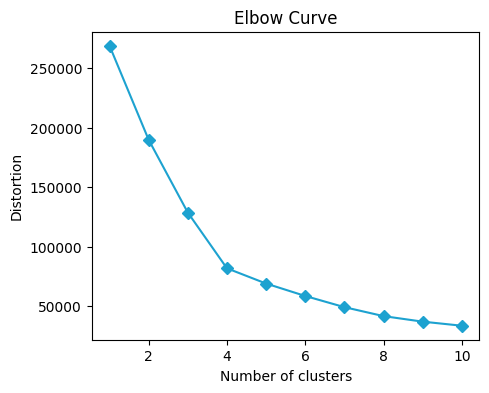

In [96]:
# membuat kurva elbow untuk menentukan jumlah klaster terbaik
plt.figure(figsize=(5,4))
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(rfm_trans)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,color='#1da2d0', marker='D', markerfacecolor='#1da2d0')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

Melihat dari grafik, jumlah klaster yang terbaik adalah berjumlah 4.

In [97]:
km = KMeans(n_clusters=4,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)

In [98]:
clusters = km.fit(rfm_trans)
labels = km.labels_

In [99]:
rfm_clean['Clusters'] = labels
rfm_clean

,Recency,Frequency,Monetary,Clusters
0,292,1,89.80,1
1,413,1,54.90,1
2,551,1,179.99,1
3,382,1,149.90,0
4,153,1,93.00,2
...,...,...,...,...
97251,170,1,78.00,2
97252,157,1,54.90,2
97253,103,1,47.90,2
97254,81,1,199.90,0


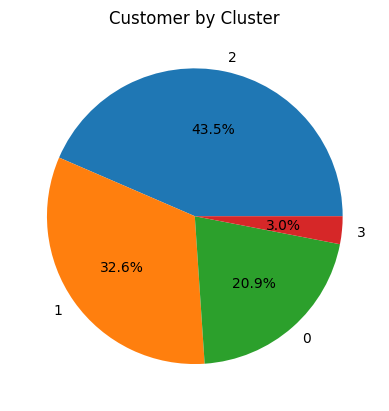

In [100]:
# Komposisi segemntasi pelanggan
rfm_clean['Clusters'].value_counts().plot(kind='pie', autopct=('%.1f%%'))
plt.title('Customer by Cluster')
plt.ylabel('');

In [101]:
# karakteristik pada setiap klaster
rfm_clean.groupby('Clusters').agg(['count', 'mean', 'median'])

Recency                    Frequency                  Monetary  \
           count        mean median     count      mean median    count   
Clusters                                                                  
0          18747  228.609271  220.0     18747  1.000000    1.0    18747   
1          29195  403.116835  394.0     29195  1.000000    1.0    29195   
2          39025  131.855093  132.0     39025  1.000000    1.0    39025   
3           2723  244.521484  229.0      2723  2.133309    2.0     2723   

                              
                mean  median  
Clusters                      
0         183.189687  175.90  
1          63.892136   59.00  
2          60.601899   55.00  
3         131.659394  119.98

## Conclusion

- Dari model klaster k-means dengan pendekatan RFM, didapatkan jumlah klaster berjumlah 4
- Klaster 0 : 20.9%, klaster 1 : 32.6%, klaster 2 : 43.5%, dan klaster 3 : 3%.
- Klaster 3 adalah pelanggan yang sering melakukan pemesanan, klaster 0 pelanggan yang memiliki pembelian terbesar, klaster 2 pelanggan yang baru melakukan transaksi, sedangkan klaster 1 yang sudah lama tidak bertransaksi.

## Export Dataset

In [102]:
df_gabung.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'shipping_limit_date', 'price', 'freight_value',
       'customer_city', 'customer_state', 'product_category_name_english',
       'month_year', 'lama_pemrosesan'],
      dtype='object')

In [103]:
data = df_gabung[['order_status','order_purchase_timestamp','price','freight_value','customer_city', 'customer_state', 'product_category_name_english','lama_pemrosesan']]
data['order_date'] = data['order_purchase_timestamp'].dt.date
data.drop('order_purchase_timestamp', axis=1, inplace=True)
data.head()

,order_status,price,freight_value,customer_city,customer_state,product_category_name_english,lama_pemrosesan,order_date
0,delivered,29.99,8.72,sao paulo,SP,housewares,8,2017-10-02
1,delivered,118.70,22.76,barreiras,BA,perfumery,13,2018-07-24
2,delivered,159.90,19.22,vianopolis,GO,auto,9,2018-08-08
3,delivered,45.00,27.20,sao goncalo do amarante,RN,pet_shop,13,2017-11-18
4,delivered,19.90,8.72,santo andre,SP,stationery,2,2018-02-13


In [104]:
data.to_pickle('data.pickle')

In [105]:
# Definisikan mapping nama klaster
cluster_names = {
    0: "Pelanggan Loyal",
    1: "Pelanggan Tidak Aktif",
    2: "Pelanggan Baru",
    3: "Pelanggan Potensial"
}

# Mengubah nama klaster
rfm_clean['Clusters'] = rfm_clean['Clusters'].map(cluster_names)

In [106]:
rfm_clean

,Recency,Frequency,Monetary,Clusters
0,292,1,89.80,Pelanggan Tidak Aktif
1,413,1,54.90,Pelanggan Tidak Aktif
2,551,1,179.99,Pelanggan Tidak Aktif
3,382,1,149.90,Pelanggan Loyal
4,153,1,93.00,Pelanggan Baru
...,...,...,...,...
97251,170,1,78.00,Pelanggan Baru
97252,157,1,54.90,Pelanggan Baru
97253,103,1,47.90,Pelanggan Baru
97254,81,1,199.90,Pelanggan Loyal


In [107]:
rfm_clean.to_pickle('rfm.pickle')

# TERIMA KASIH